In [19]:
import xarray as xr
import os
import oscarplus as op
import plot_helpers as ph
from oscarplus.processing.secondary_products import calculate_upwelling_SWT

# Making figures 1, 2 and 4

## Input parameters for plotting

In [20]:
# OSCAR
date = "20220522"
track_1 = "2"
track_2 = "2b"
gmf = "mouche12kp20_rsv20"

## Load and process data for single day plots and transects

In [21]:
# load bathymetry
bathymetry_path = op.tools.readers.get_data_dirs()["bathymetry"]
bathymetry = xr.open_mfdataset(
    os.path.join(bathymetry_path, "Iroise_Sea_Bathymetry_EMODnet.nc")
)  # change path to select a different file

# load OSCAR
OSCAR_1, _ = op.tools.readers.read_OSCAR(date, track_1, gmf, "L2a MF")
calculate_upwelling_SWT(OSCAR_1, -bathymetry["elevation"])  # add currentW to L2a_MF
OSCAR_1 = op.tools.utils.cut_NaNs(OSCAR_1)

OSCAR_2, _ = op.tools.readers.read_OSCAR(date, track_2, gmf, "L2a MF")
calculate_upwelling_SWT(OSCAR_2, -bathymetry["elevation"])  # add currentW to L2a_MF
OSCAR_2 = op.tools.utils.cut_NaNs(OSCAR_2)

# load MARS2D
MARS2D = op.tools.readers.read_MARS2D(
    "MARC_L1-MARS2D-FINIS250_SEASTAREX_20220522.nc", 250
)
MARS2D_extent = [-5.18, -5.10, 48.368, 48.525]
MARS2D = op.tools.utils.cut_to_extent(MARS2D, MARS2D_extent)
op.processing.secondary_products.calculate_secondary_products(MARS2D)
calculate_upwelling_SWT(MARS2D, -bathymetry["elevation"])  # add currentW to MARS2D
MARS2D

C:\Users\arius\python_modules\oscarplus\tools\utils.py:661: UserWarning: EarthRelativeWindU and EarthRelativeWindV not found in L2_AR_MF
  warnings.warn("EarthRelativeWindU and EarthRelativeWindV not found in L2_AR_MF")
C:\Users\arius\python_modules\oscarplus\tools\utils.py:661: UserWarning: EarthRelativeWindU and EarthRelativeWindV not found in L2_AR_MF
  warnings.warn("EarthRelativeWindU and EarthRelativeWindV not found in L2_AR_MF")


<xarray.Dataset>
Dimensions:                      (GroundRange: 24, CrossRange: 69, ni_u: 584,
                                  nj_u: 754, ni_v: 584, nj_v: 754, ni_f: 584,
                                  nj_f: 754, time: 12, level: 1)
Coordinates: (12/16)
  * GroundRange                  (GroundRange) float32 134.0 135.0 ... 157.0
  * CrossRange                   (CrossRange) float32 459.0 460.0 ... 527.0
  * ni_u                         (ni_u) float32 1.5 2.5 3.5 ... 583.5 584.5
  * nj_u                         (nj_u) float32 1.0 2.0 3.0 ... 753.0 754.0
  * ni_v                         (ni_v) float32 1.0 2.0 3.0 ... 583.0 584.0
  * nj_v                         (nj_v) float32 1.5 2.5 3.5 ... 753.5 754.5
    ...                           ...
  * time                         (time) datetime64[ns] 2022-05-22T05:00:00 .....
  * level                        (level) float32 -0.5
    longitude_u                  (nj_u, ni_u) float32 dask.array<chunksize=(754, 584), meta=np.ndarray>
    longitude_v                  (nj_v, ni_v) float32 dask.array<chunksize=(754, 584), meta=np.ndarray>
    latitude_u                   (nj_u, ni_u) float32 dask.array<chunksize=(754, 584), meta=np.ndarray>
    latitude_v                   (nj_v, ni_v) float32 dask.array<chunksize=(754, 584), meta=np.ndarray>
Data variables: (12/23)
    SIG                          (level) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    H0                           (CrossRange, GroundRange) float32 dask.array<chunksize=(69, 24), meta=np.ndarray>
    HX                           (nj_u, ni_u) float32 dask.array<chunksize=(754, 584), meta=np.ndarray>
    HY                           (nj_v, ni_v) float32 dask.array<chunksize=(754, 584), meta=np.ndarray>
    XE                           (time, CrossRange, GroundRange) float32 dask.array<chunksize=(12, 69, 24), meta=np.ndarray>
    U                            (time, nj_u, ni_u) float32 dask.array<chunksize=(12, 754, 584), meta=np.ndarray>
    ...                           ...
    CurrentCurl                  (time, CrossRange, GroundRange) float64 dask.array<chunksize=(12, 69, 24), meta=np.ndarray>
    CurrentShearRate             (time, CrossRange, GroundRange) float64 0.00...
    CurrentStrainRate            (time, CrossRange, GroundRange) float64 0.00...
    CurrentKineticEnergyDensity  (time, CrossRange, GroundRange) float64 0.00...
    CurrentEnstrophy             (time, CrossRange, GroundRange) float64 2.18...
    CurrentW                     (CrossRange, GroundRange, time) float64 -0.0...
Attributes: (12/56)
    limi:                    0
    lima:                    583
    pasi:                    1
    ljmi:                    0
    ljma:                    10
    pasj:                    1
    ...                      ...
    comment:                 Use of Meteo-France AROME & ARPEGE meteorologica...
    area:                    Iroise Sea
    start_date:              2022-05-22T05:00:00Z
    stop_date:               2022-05-22T05:00:00Z
    field_type:              0.25-hourly
    Resolution:              250x250m

In [22]:
# Take transects
current_transect, elevation_transect = op.tools.utils.transect(
    OSCAR_1,
    bathymetry,
    iGround=10,
    jCross=24,
    angle=0,
)

## Make figures

Max velocity: 2.1882490618829067
Divergence range: -15.963307918895897,14.498740781759452
Vertical velocity range: -0.13158351845057725,0.12187175987324135


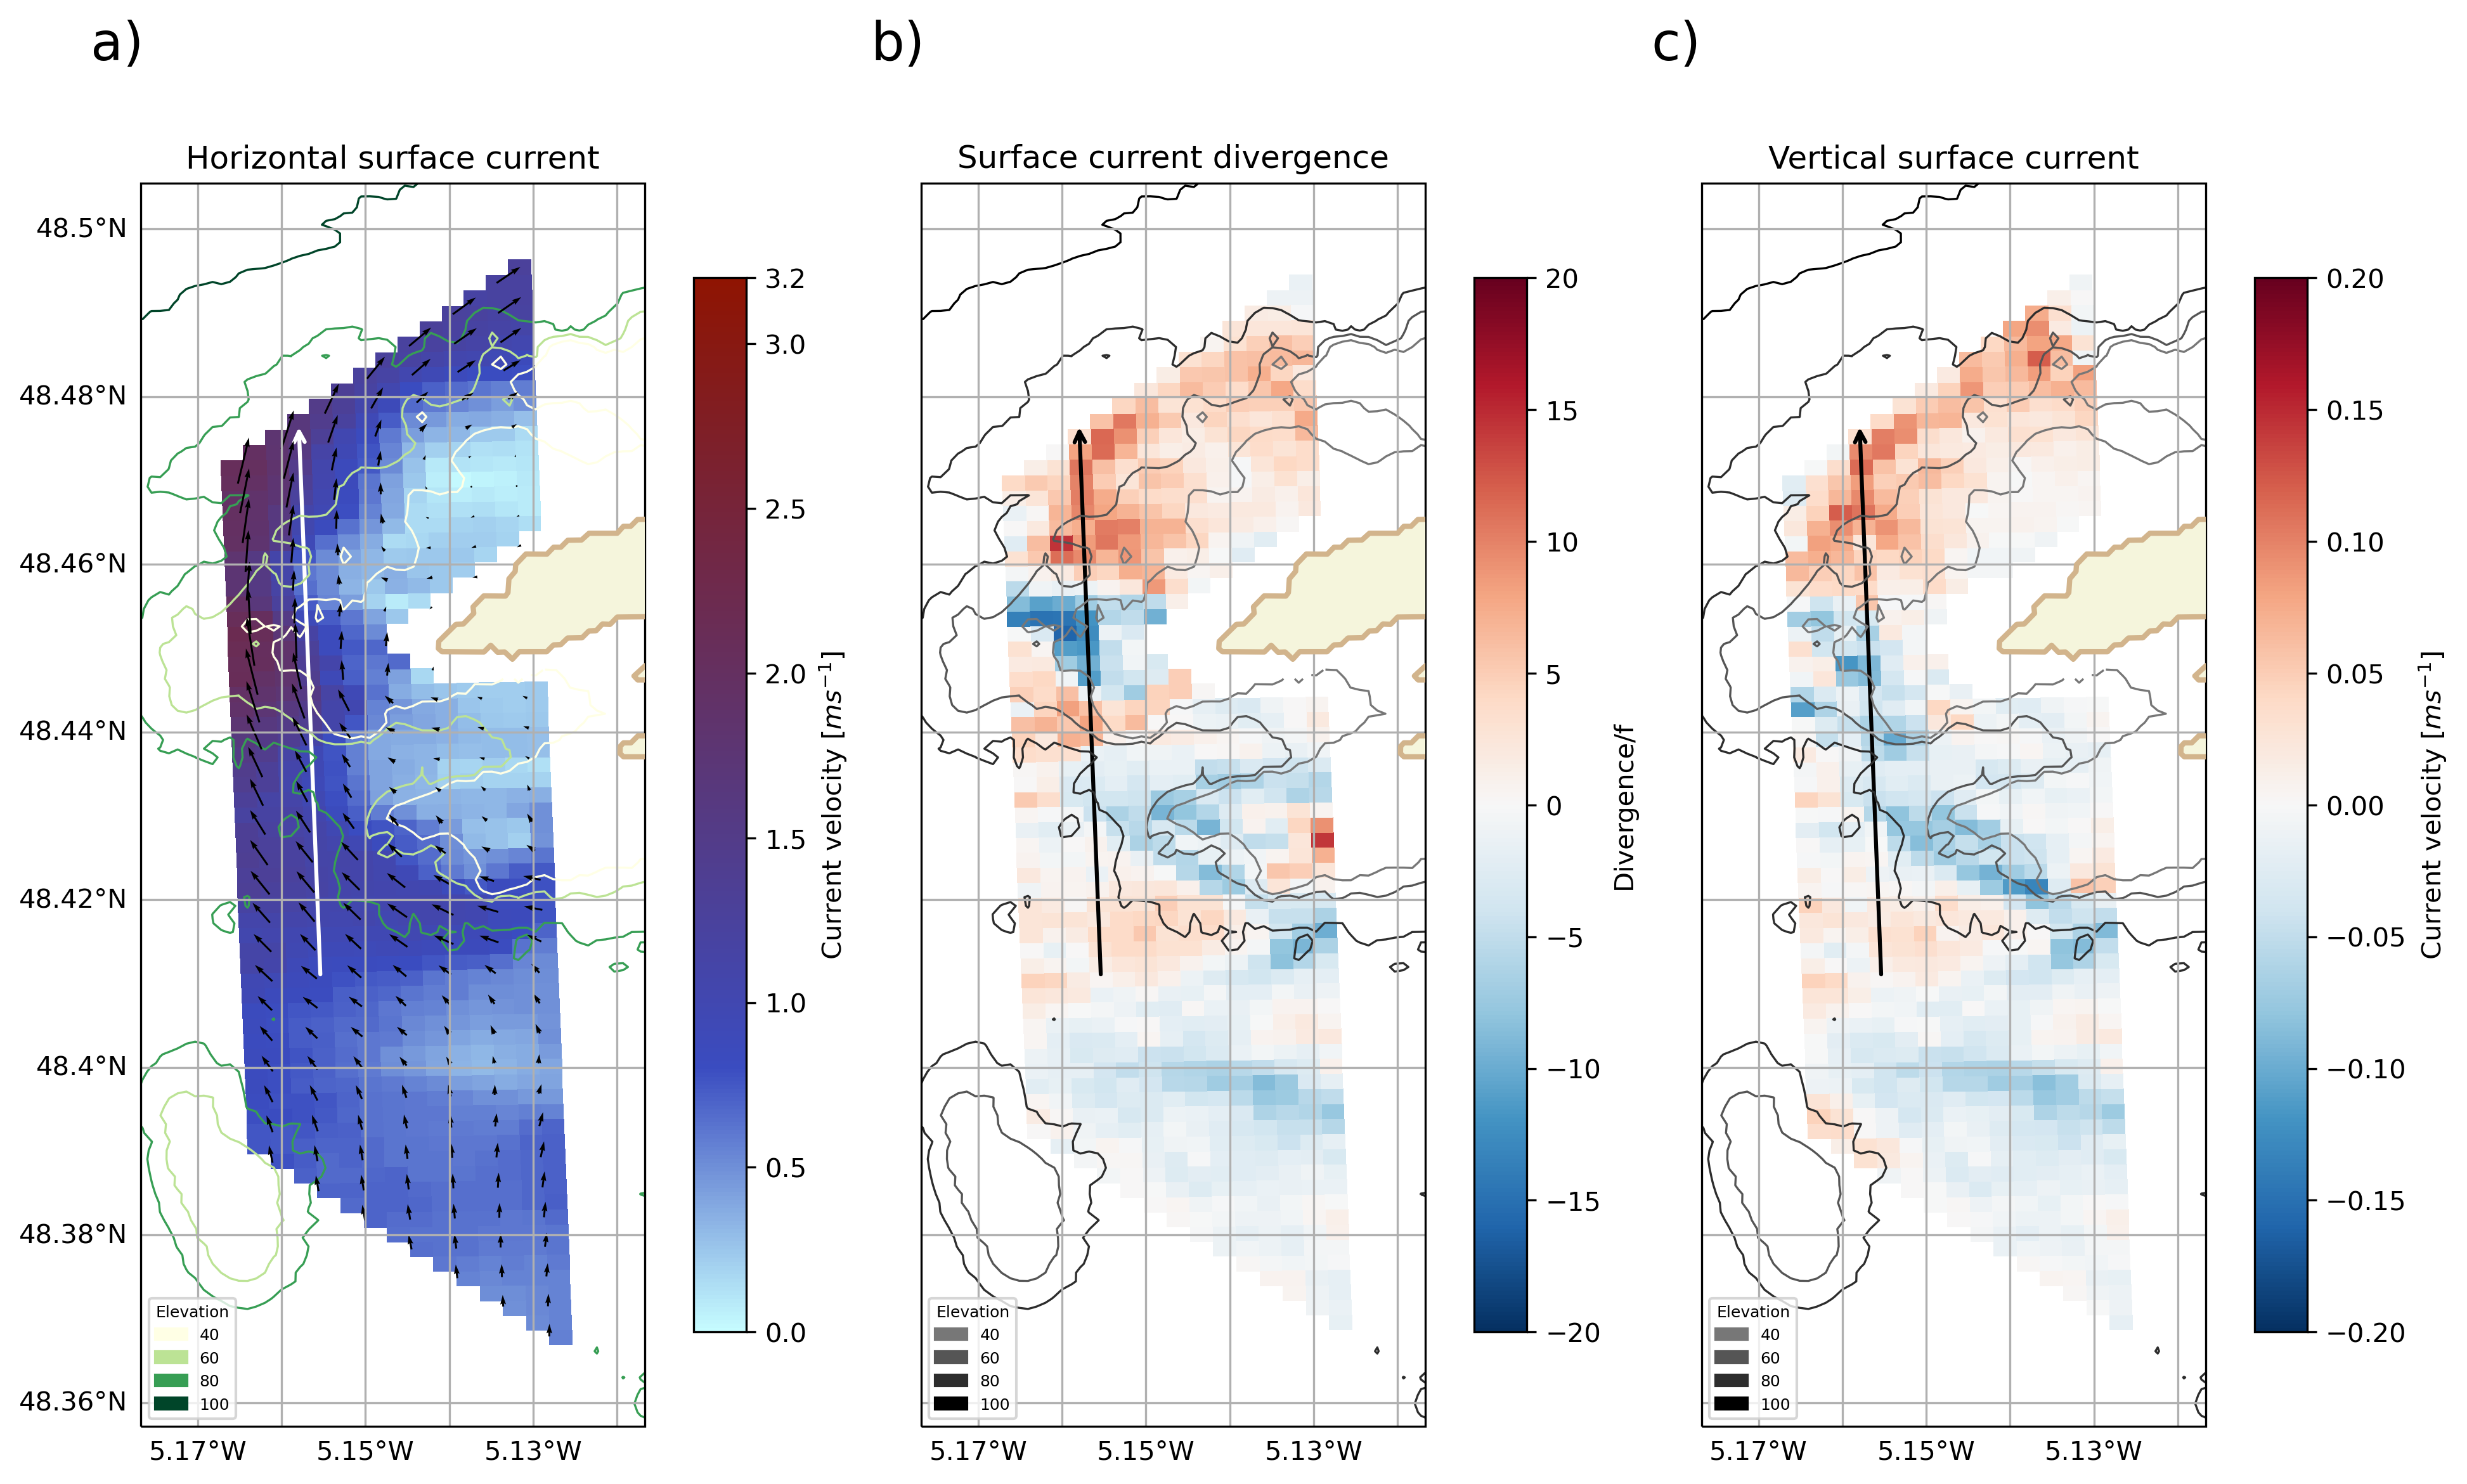

In [23]:
# plot figure 1
axes = ph.plot_all_three_on_one(
    DS=OSCAR_1,
    bathymetry=bathymetry,
    figsize=(15, 9),
    legend_location="lower left",
    xoffset=-0.01,
    yoffset=-0.01,
)

# find the coordinates of the transects
coordinates = ph.extract_transect_range(current_transect)

# add arrows
ph.add_arrow(axes[0], **coordinates, color="white", linewidth=1.5)
for ax in axes[1:]:
    ph.add_arrow(ax, **coordinates, color="black", linewidth=1.5)

ph.print_ranges(OSCAR_1)

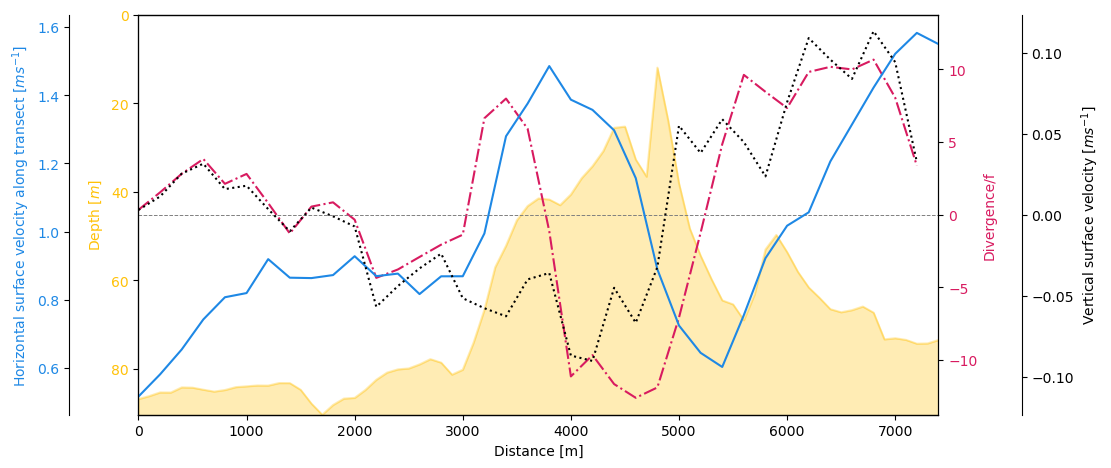

In [24]:
# plot figure 2
current_transects = [current_transect]
elevation_transects = [elevation_transect]
transect_axes = ph.plot_transects(
    current_transects, elevation_transects, figsize=(10, 5)
)

Max velocity: 1.8878154439074832
Divergence range: -15.303813621254085,12.753308067682823
Vertical velocity range: -0.1129845171782166,0.09275634414488668


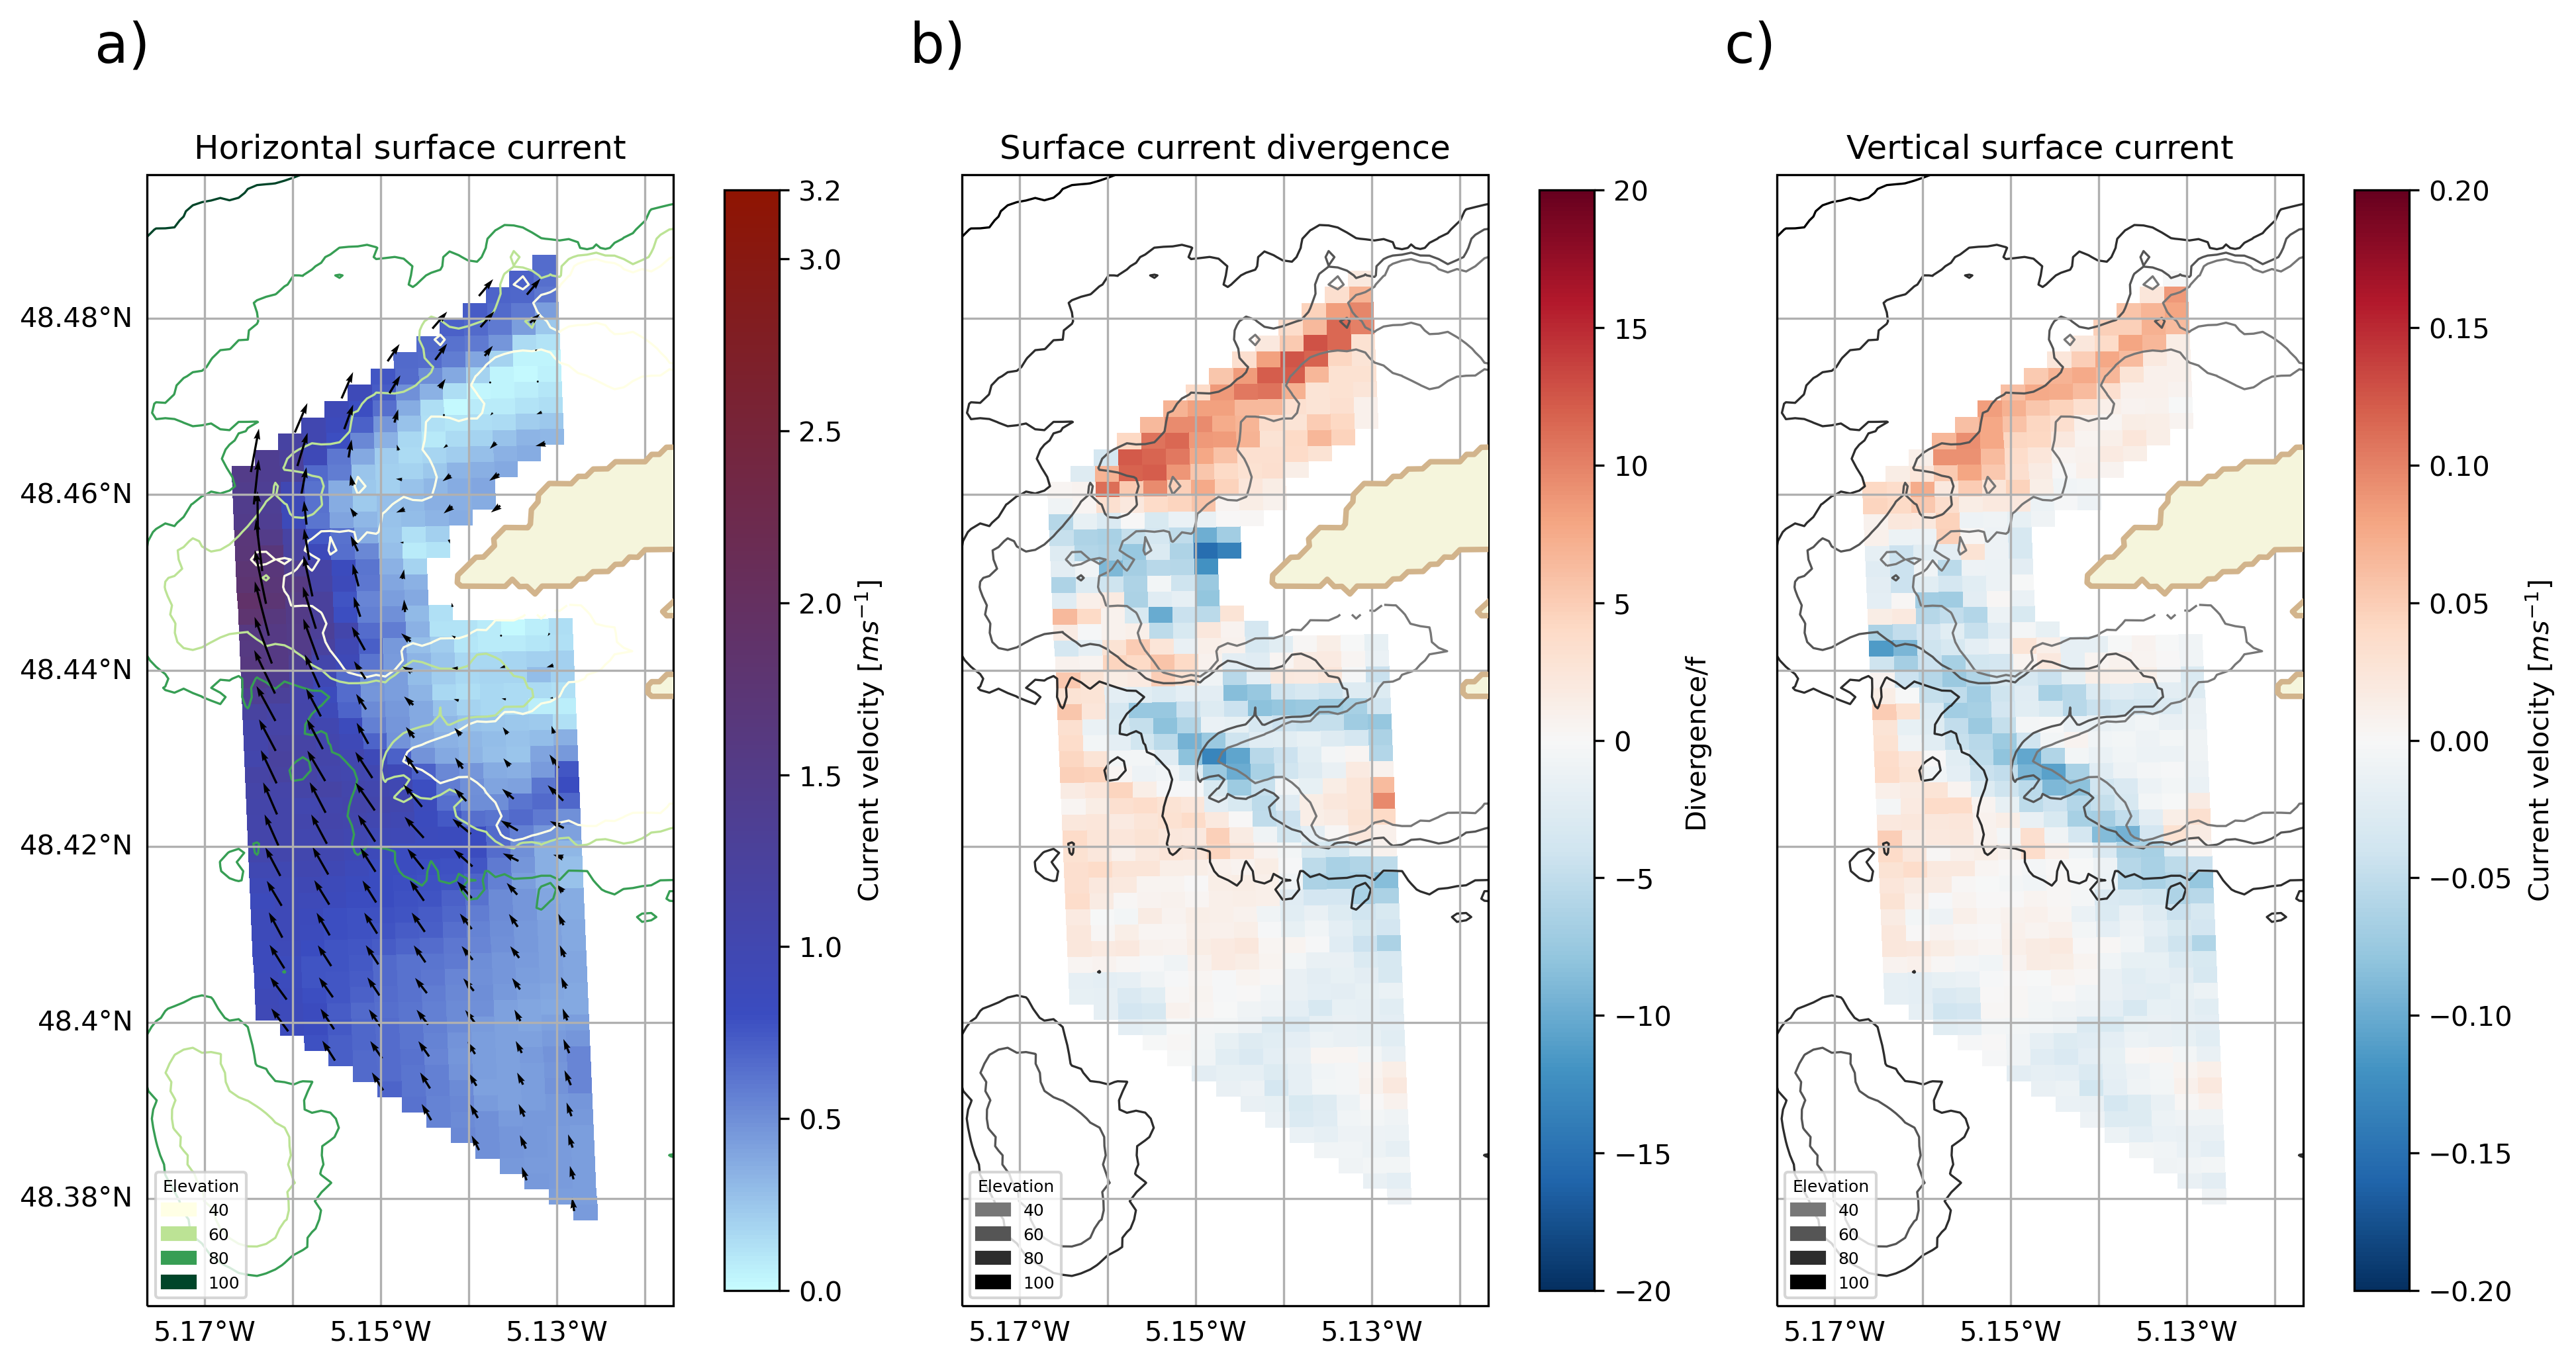

In [25]:
# plot figure 1
axes = ph.plot_all_three_on_one(
    DS=OSCAR_2,
    bathymetry=bathymetry,
    figsize=(15, 9),
    legend_location="lower left",
    xoffset=-0.01,
    yoffset=-0.01,
)

ph.print_ranges(OSCAR_2)

C:\Users\arius\python_modules\oscarplus\tools\utils.py:661: UserWarning: EarthRelativeWindU and EarthRelativeWindV not found in L2_AR_MF
  warnings.warn("EarthRelativeWindU and EarthRelativeWindV not found in L2_AR_MF")
C:\Users\arius\python_modules\oscarplus\tools\utils.py:661: UserWarning: EarthRelativeWindU and EarthRelativeWindV not found in L2_AR_MF
  warnings.warn("EarthRelativeWindU and EarthRelativeWindV not found in L2_AR_MF")
C:\Users\arius\python_modules\oscarplus\tools\utils.py:661: UserWarning: EarthRelativeWindU and EarthRelativeWindV not found in L2_AR_MF
  warnings.warn("EarthRelativeWindU and EarthRelativeWindV not found in L2_AR_MF")
c:\Users\arius\python_modules\oscarplus\examples\Iroise Sea divergence paper\plot_helpers.py:790: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(


array([[<GeoAxes: title={'center': 'Current at 05:45'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>,
        <GeoAxes: title={'center': 'Current at 06:30'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>,
        <GeoAxes: title={'center': 'Current at 07:30'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>],
       [<GeoAxes: title={'center': 'Divergence at 05:45'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>,
        <GeoAxes: title={'center': 'Divergence at 06:30'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>,
        <GeoAxes: title={'center': 'Divergence at 07:30'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>]],
      dtype=object)

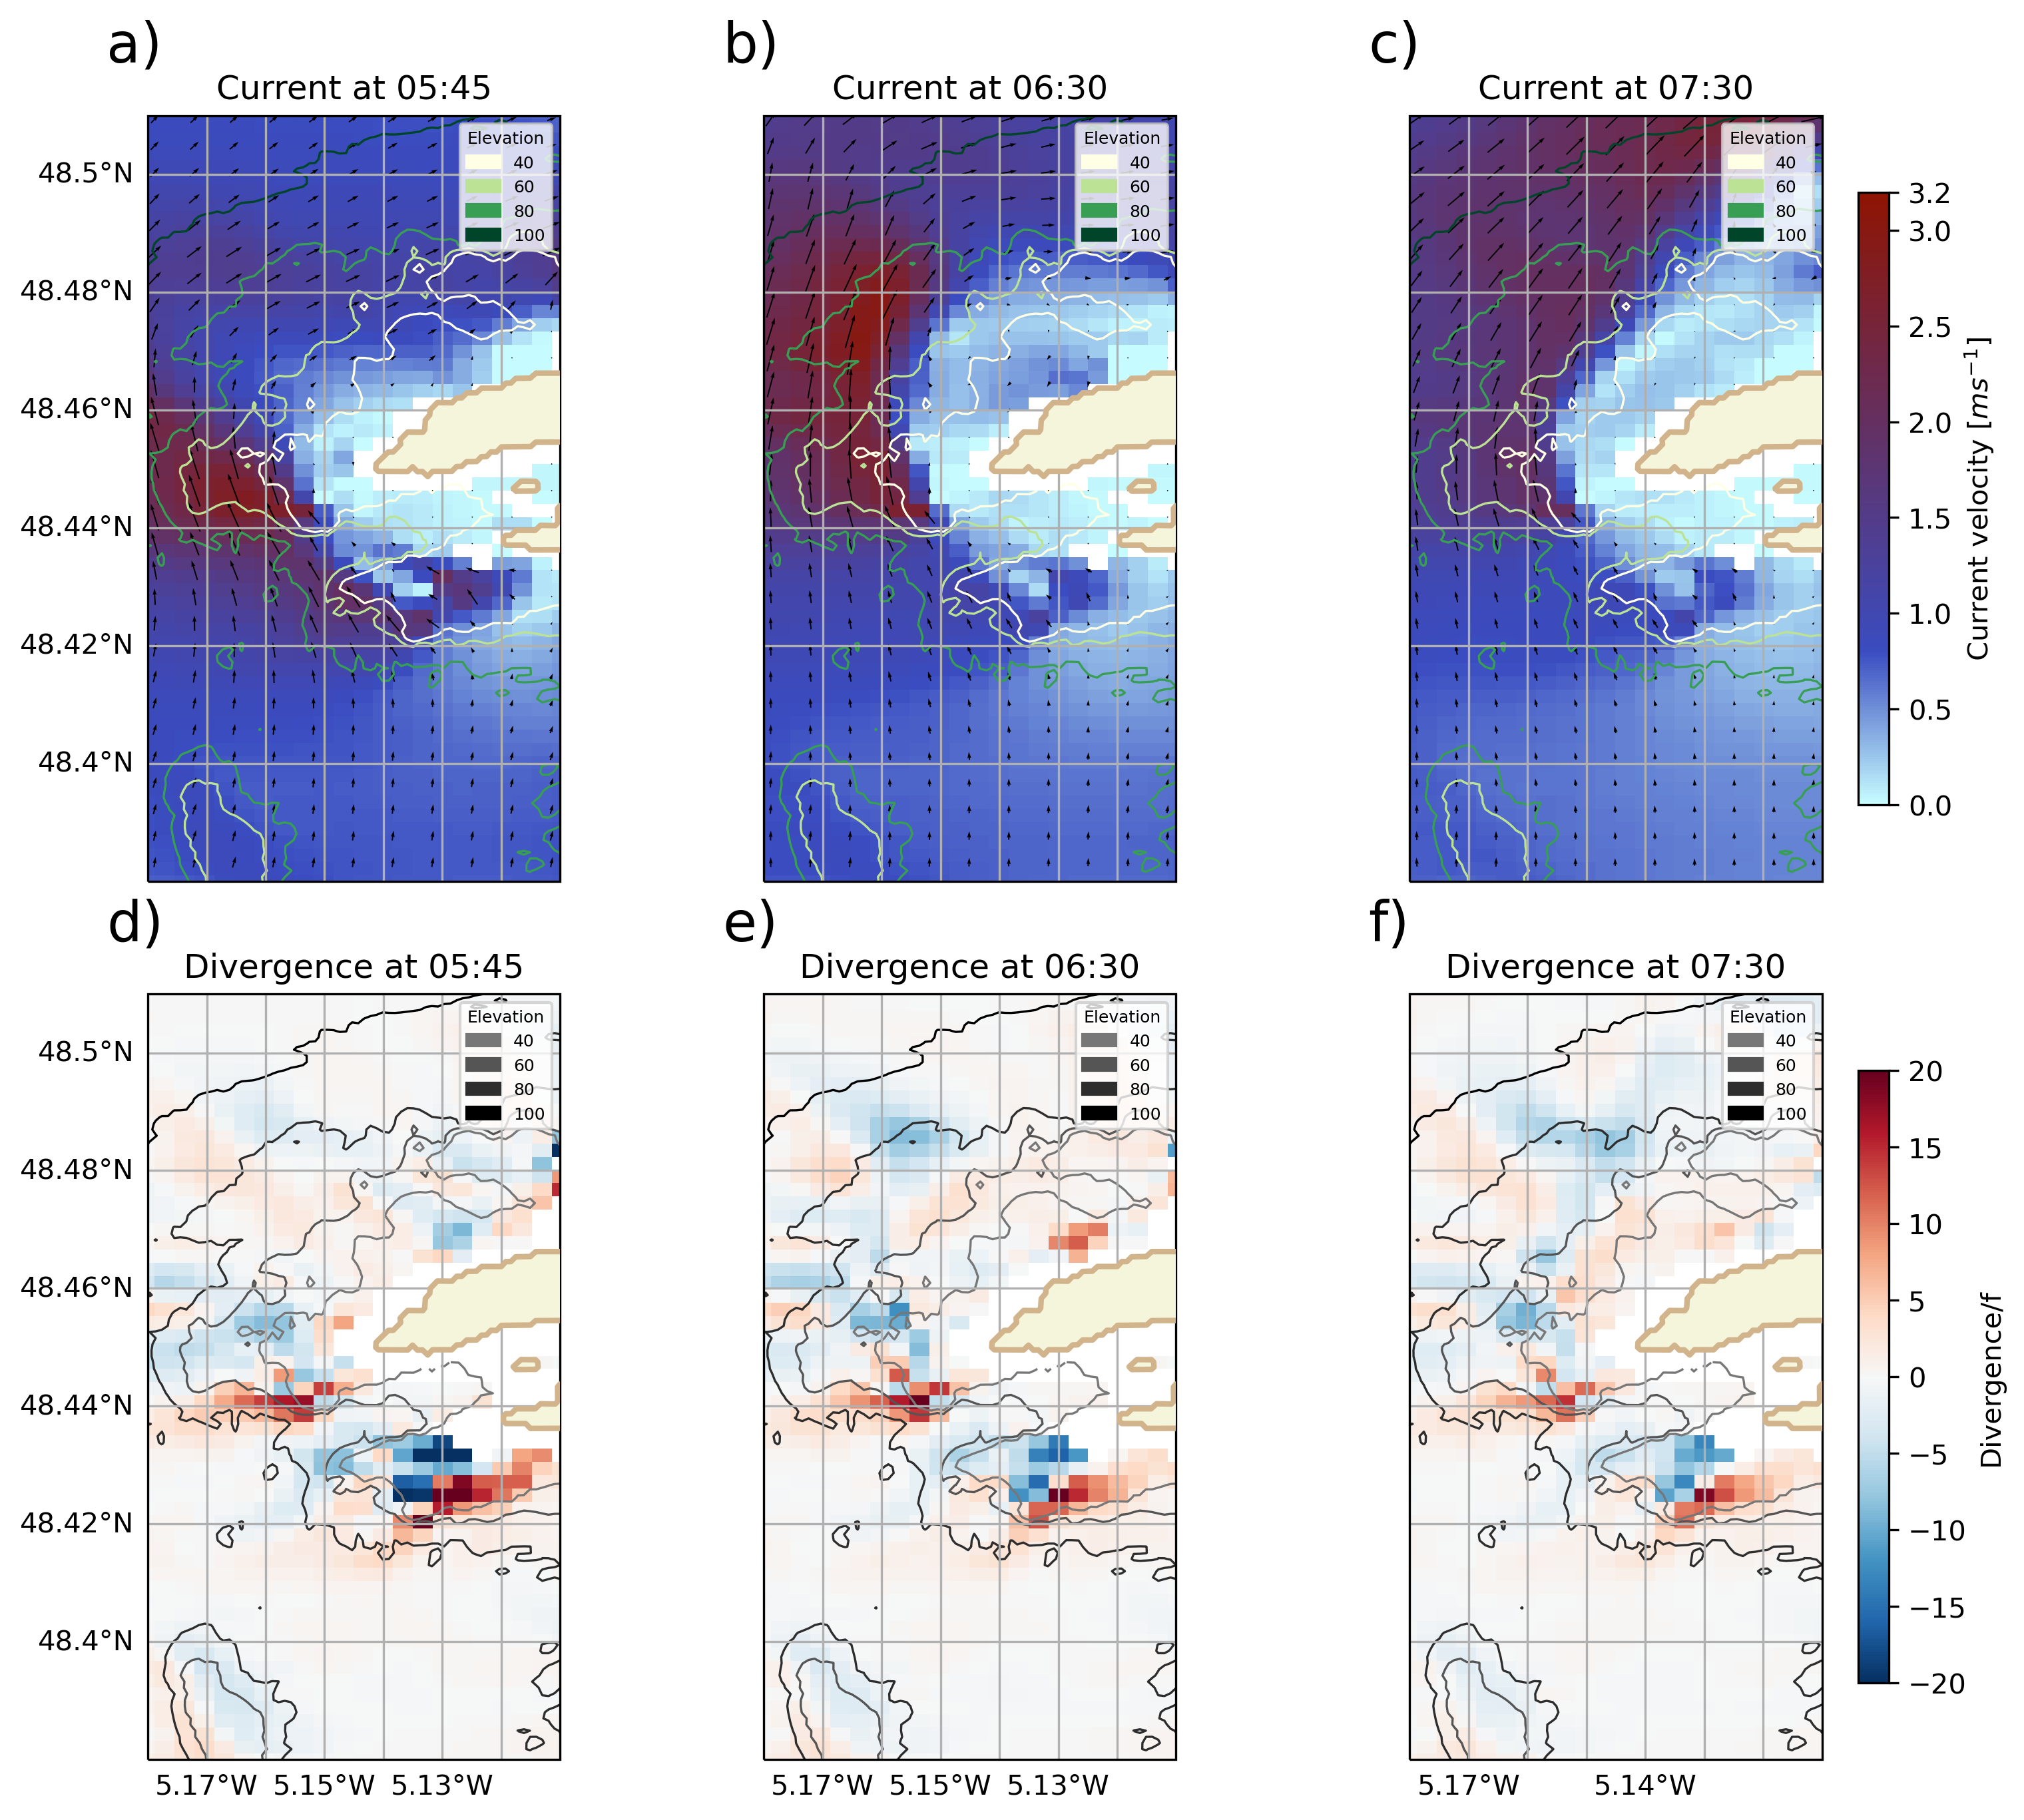

In [28]:
MARS2DTIMES = ["2022-05-22T05:45:00.000000000", "2022-05-22T06:30:00.000000000", "2022-05-22T7:30:00.000000000"]

MARS2Ds = []
for t in MARS2DTIMES:
    MARS2D_sub = MARS2D.sel(time=t)
    MARS2D_sub = op.tools.utils.cut_to_extent(MARS2D_sub, MARS2D_extent)
    op.processing.secondary_products.calculate_secondary_products(MARS2D_sub)
    MARS2Ds.append(MARS2D_sub)

extent = [-5.18, -5.11, 48.38, 48.51]

ph.MARS2D_through_time(MARS2Ds, bathymetry, figsize=(10, 9), extent=extent)